<h1> INDIAN PREMIER LEAGUE -- Data Analysis and Machine Learning Part 1</h1>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
matches = pd.read_csv("Datasets/matches.csv")
deliveries = pd.read_csv("Datasets/deliveries.csv")

<h3> Displaying some data from both the datasets </h3>

In [2]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


<h2 style = 'color:#8B1A1A'>1. Total Seasons Played in IPL and total Matches Played in each season of IPL</h2>

In [4]:
season = np.sort(matches['season'].unique())
print("The Number of Seasons in all are",len(season), "which are" , season)

The Number of Seasons in all are 10 which are [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


<h3> Plotting a histogram to get No. Of matches  v/s seasons </h3>

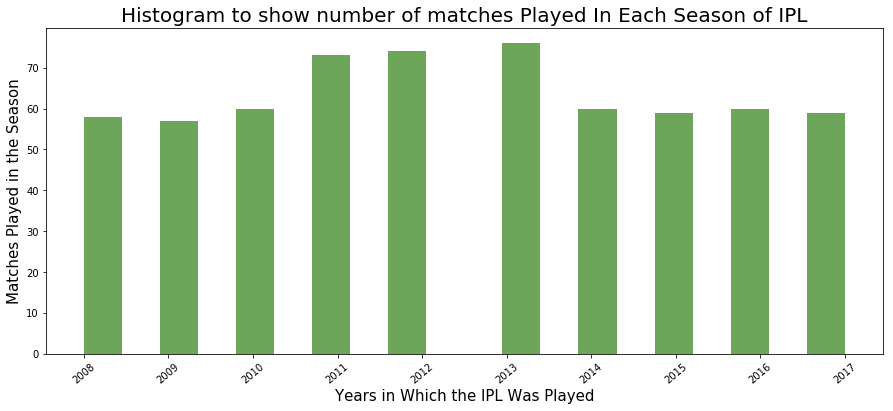

In [5]:
# Plotting a Histogram to get the number of seasons and no. of matches played in each season. 
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 6
matches['season'].hist(color = '#6DA65A',bins = 20,  grid = False)
plt.title("Histogram to show number of matches Played In Each Season of IPL",fontsize = 20)
plt.xlabel("Years in Which the IPL Was Played", fontsize = 15)
plt.ylabel("Matches Played in the Season", fontsize = 15)
plt.xticks(np.arange(2008,2018, step = 1), rotation=40)
plt.show()

<h3> Calculating average number of matches played in all seasons </h3>

In [6]:
i = 0;
match_no = []
while(i < len(season)):
    match_no.append(len(matches[matches['season'] == season[i]]['id']))
    i = i + 1;
mean = np.mean(match_no)
print("The Average Number of Matches played in all seasons combined", mean)

The Average Number of Matches played in all seasons combined 63.6


<h2 style = 'color:#8B1A1A'> 2. Wins of all Teams in All IPLS and finding the winning percentage for each Team</h2>

In [7]:
#finding the number of teams in all seasons of IPL 
team1 = matches['team1'].unique()
matches = matches.replace("Rising Pune Supergiants", "Rising Pune Supergiant")
print("The total teams that participated in all seasons of IPLs are", len(team1))
matches['team1'].unique()

The total teams that participated in all seasons of IPLs are 14


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

<h3> Plotting a bar chart to get total matches and total wins in each season for each team </h3>

Text(0.5,1,'Grouped Bar Plot for total matches and wins of Each Team in All Seasons')

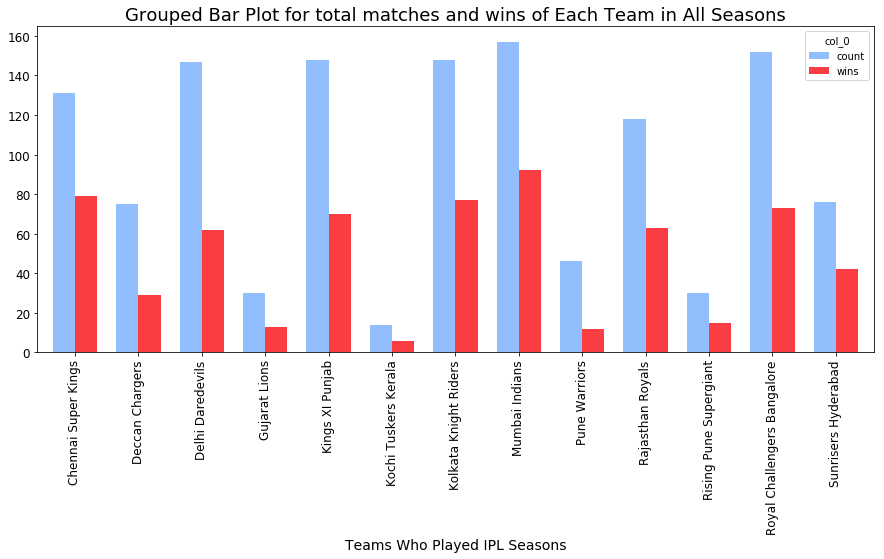

In [8]:
# Finding the number of matches played by each team.
#Finding the unique teams in the IPL Matches
team1 = matches['team1'].unique()
# Finding the number of matches played as team1 and team2 by the teams 
team1_all = pd.crosstab(index = matches['team1'], columns = 'count')
team2_all = pd.crosstab(index = matches['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
final_team = team1_all.add(team2_all)
# Finding the total matches won by the team
winner = pd.crosstab(index = matches['winner'], columns = "count")
final_team['wins'] = winner['count']
final_team[['count', 'wins']].plot(kind = 'bar' ,  width = 0.7,   color=['#93BEFE' , '#F93D43'],fontsize = 12)
plt.xlabel("Teams Who Played IPL Seasons", fontsize = 14)
plt.title("Grouped Bar Plot for total matches and wins of Each Team in All Seasons", fontsize = 18)

<h3> Finding the winning percentage for each team in all seasons and arranging teams in order </h3>

In [9]:
#Calculating the percentage of the wins for all the teams
final_team['percent'] = final_team['wins']/final_team['count'] * 100 
final_team.sort_values(by = 'percent', ascending = False)

col_0,count,wins,percent
team1,,,
Chennai Super Kings,131,79,60.305344
Mumbai Indians,157,92,58.598726
Sunrisers Hyderabad,76,42,55.263158
Rajasthan Royals,118,63,53.389831
Kolkata Knight Riders,148,77,52.027027
Rising Pune Supergiant,30,15,50.000000
Royal Challengers Bangalore,152,73,48.026316
Kings XI Punjab,148,70,47.297297
Gujarat Lions,30,13,43.333333


<h3> Getting the average wins and percent </h3>

In [10]:
#Calculating the average number of matches played by each team
mean = final_team['count'].mean()
print("The average no. of matches are", mean)
print("The teams who have played less than average matches are" ,sum(final_team['count'] < mean))

The average no. of matches are 97.84615384615384
The teams who have played less than average matches are 6


In [11]:
#Calculating average number of wins 
mean_win = final_team['percent'].mean()
print("The average percent win is", mean_win)
print("The teams who have won more than average winning percentage are" ,sum(final_team['percent'] > mean_win))

The average percent win is 47.54066679002237
The teams who have won more than average winning percentage are 7


<h2 style = 'color:#8B1A1A'> 3. Analysis on Number of Seasons A Team has Played   </h2>

<h3> Determining Which Team has played from which Season to Which using Stacked Bar Graph</h3>

Text(0,0.5,'Teams Playing in IPL in all Seasons')

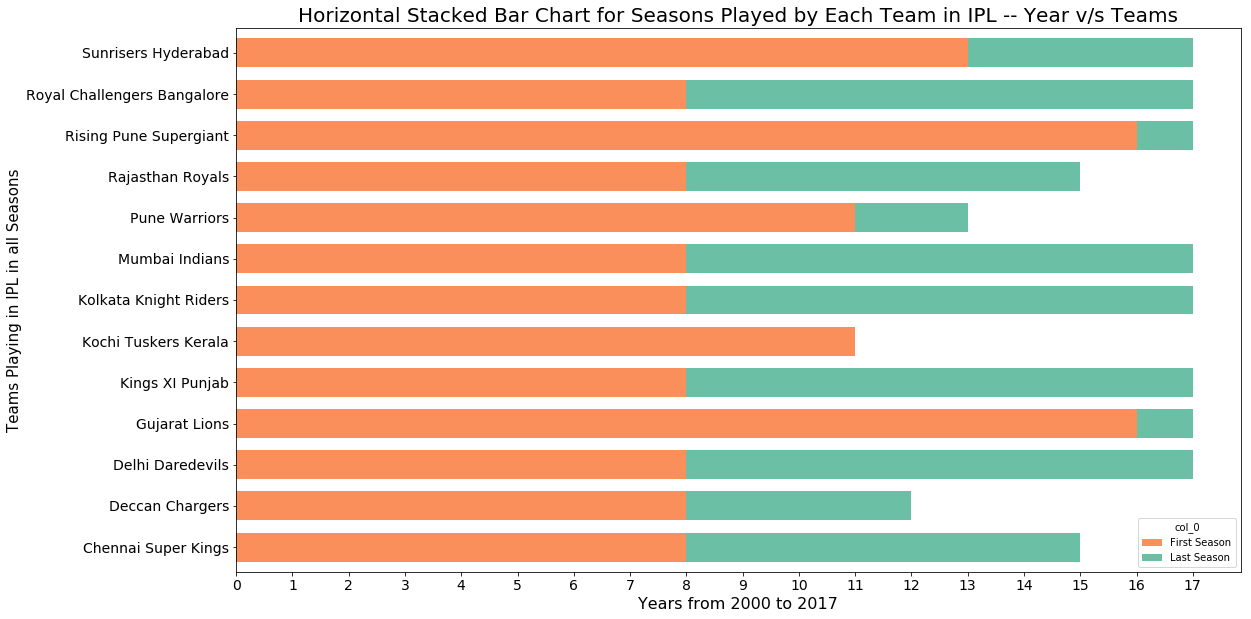

In [12]:
# Determining the first and the last seasons of IPL 
i = 0;
team_order = np.sort(matches['team1'].unique())
array = []
first = []
last = []
while i < 13:
    array = np.sort(list(matches[matches['team1'] == team_order[i]]['season'].unique()))
    first.append(array[0] % 2000)
    last.append(array[len(array)-1] - array[0])
    i = i +1
final_team['First Season']= first
final_team['Last Season'] = last
final_team['seasons'] = [x+1 for x in last]
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 10
final_team[['First Season' , 'Last Season']].plot(kind = 'barh', stacked = True, rot = 0, xticks = np.arange(0,18,1),
                                                  fontsize = 14,width = 0.7,   color=['#FB8F5B' , '#6ABFA5']) 
plt.title('Horizontal Stacked Bar Chart for Seasons Played by Each Team in IPL -- Year v/s Teams', fontsize = 20)
plt.xlabel("Years from 2000 to 2017", fontsize = 16)
plt.ylabel("Teams Playing in IPL in all Seasons", fontsize  = 15)

<h3>Getting the Number of Seasons played by each team and arranging them wrt to seasons and winning percentage </h3>

In [13]:
final_team = final_team.drop(columns = ['First Season' , 'Last Season'])
final_team.sort_values(['seasons', 'percent'], ascending = [False, False])

col_0,count,wins,percent,seasons
team1,,,,
Mumbai Indians,157,92,58.598726,10
Kolkata Knight Riders,148,77,52.027027,10
Royal Challengers Bangalore,152,73,48.026316,10
Kings XI Punjab,148,70,47.297297,10
Delhi Daredevils,147,62,42.176871,10
Chennai Super Kings,131,79,60.305344,8
Rajasthan Royals,118,63,53.389831,8
Sunrisers Hyderabad,76,42,55.263158,5
Deccan Chargers,75,29,38.666667,5


<p> So, 4 teams have played 10 matches and though KKR appear to be number 5 in overall list but it had played in all 10 seasons.So in that case it has second highest winning percentage.</p>
<p>Also, Kochi Tuskers Kerala is the only team which played in just 1 year in 2011 and never played after that</p>
<p> But there has been a change in the past 2 years. Some big and really good teams like CSK, RR have not played and some new teams have joined which are Gujrat Lions and Rising Pune Supergiants</p>


<h2 style = 'color:#8B1A1A'> 4 A.Percentage of matches Played By A Team In Different Cities (TEAM WISE) </h2>

<h3> Removing the Entries which have no cities </h3>

In [14]:
#Finding the Cities in which matches were played 
null = matches.isnull()
print("The entries which have no cities mentioned are" , sum(null['city']))
print(matches[null['city'] == True]['id'])
# Removing all these matches by these specific indices
matches_clean = matches.drop(matches.index[[461,462,466,468,469,474,476]])

The entries which have no cities mentioned are 7
461    462
462    463
466    467
468    469
469    470
474    475
476    477
Name: id, dtype: int64


<h3>Preparing for analysis</h3>

In [15]:
final_team_city = final_team[final_team['count'] > 70]
final_team_city = final_team_city.sort_values(by = 'count', ascending = False)
cities = pd.crosstab(index = matches_clean['city'], columns = 'count').sort_values(by = 'count', ascending = False)
cities_analyse = cities[cities['count'] > 40]

<h3>Analysis on Teams winning matches in different cities</h3>

In [16]:
#Finding the cities in Which MUMBAI INDIANS WON for PIE CHART 1
matcheswin = matches_clean[matches_clean['winner'] == "Mumbai Indians"]
winner_MI = pd.crosstab(index = matcheswin['city'],columns= 'count' )
winner_MI = winner_MI[winner_MI['count'] > 2].sort_values(by = 'count' , ascending = False)
#Finding the cities in Which RCB WON -- PIE CHART 1
matcheswin2 = matches_clean[matches_clean['winner'] == "Royal Challengers Bangalore"]
winner_RCB = pd.crosstab(index = matcheswin2['city'],columns= 'count' )
winner_RCB = winner_RCB[winner_RCB['count'] > 3].sort_values(by = 'count' , ascending = False)
#Finding the cities in Which CSK WON -- PIE CHART 1
matcheswin3 = matches_clean[matches_clean['winner'] == "Chennai Super Kings"]
winner_CSK = pd.crosstab(index = matcheswin3['city'],columns= 'count' )
winner_CSK = winner_CSK[winner_CSK['count'] > 2].sort_values(by = 'count' , ascending = False)
#Finding the cities in Which DD WON -- PIE CHART 1
matcheswin4 = matches_clean[matches_clean['winner'] == "Delhi Daredevils"]
winner_DD = pd.crosstab(index = matcheswin4['city'],columns= 'count' )
winner_DD = winner_DD[winner_DD['count'] > 2].sort_values(by = 'count' , ascending = False)
#Finding the cities in Which KKR WON -- PIE CHART 1
matcheswin5 = matches_clean[matches_clean['winner'] == "Kolkata Knight Riders"]
winner_KKR = pd.crosstab(index = matcheswin5['city'],columns= 'count' )
winner_KKR = winner_KKR[winner_KKR['count'] > 2].sort_values(by = 'count' , ascending = False)
#Finding the cities in Which KIP WON -- PIE CHART 1
matcheswin6 = matches_clean[matches_clean['winner'] == "Kings XI Punjab"]
winner_KIP = pd.crosstab(index = matcheswin6['city'],columns= 'count' )
winner_KIP = winner_KIP[winner_KIP['count'] > 3].sort_values(by = 'count' , ascending = False)

<h3>Plotting Pie  Charts </h3>

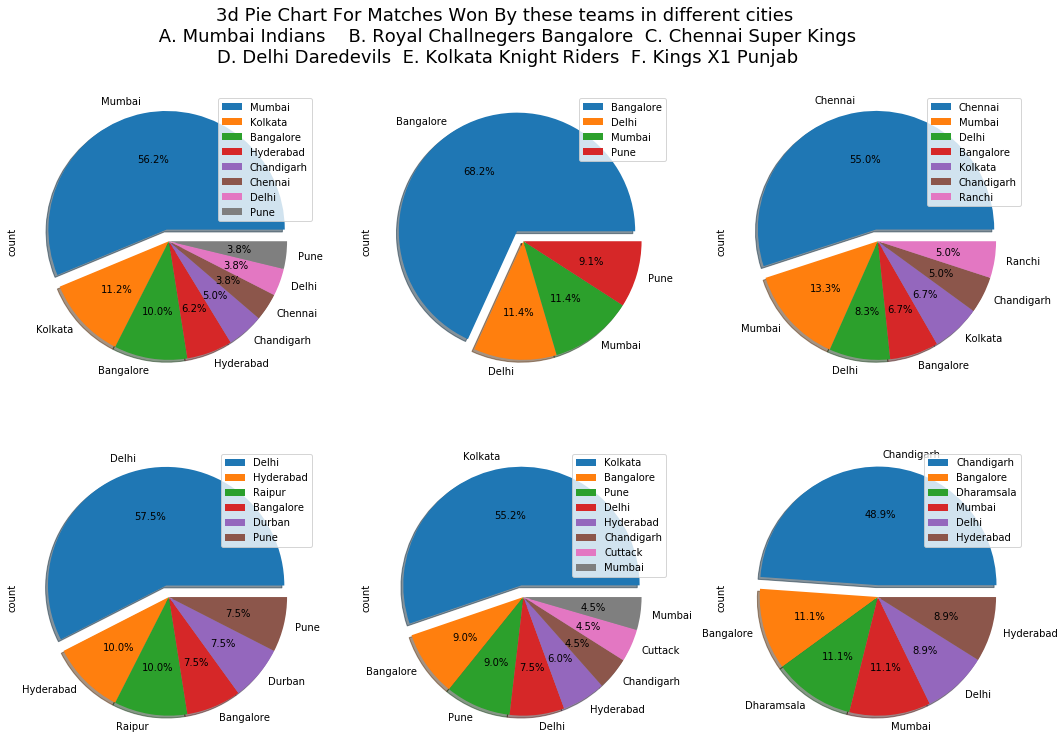

In [17]:
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 12
fig, axs = plt.subplots(2,3)
plt.suptitle("3d Pie Chart For Matches Won By these teams in different cities \n "
             "A. Mumbai Indians    B. Royal Challnegers Bangalore  C. Chennai Super Kings \n"
             "D. Delhi Daredevils  E. Kolkata Knight Riders  F. Kings X1 Punjab", fontsize = 18)
explode1 = (0.1, 0, 0 , 0 , 0 ,0 , 0 , 0)
explode2 = (0.1,0,0,0)
explode3 = (0.1, 0 , 0 , 0 ,0 , 0 , 0 )
explode4 = (0.1, 0,0,0,0,0)
winner_MI.plot(kind = 'pie' , subplots = True, ax=axs[0][0], explode = explode1,  autopct='%1.1f%%',shadow=True)
winner_RCB.plot(kind = 'pie' , subplots = True, ax = axs[0][1], explode = explode2, autopct = '%1.1f%%', shadow = True)
winner_CSK.plot(kind = 'pie' ,subplots = True, ax = axs[0][2], explode = explode3, autopct = "%1.1f%%", shadow = True)
winner_DD.plot(kind = 'pie' , subplots = True, ax=axs[1][0], explode = explode4, autopct = "%1.1f%%", shadow = True)
winner_KKR.plot(kind = 'pie' , subplots = True, ax = axs[1][1], explode = explode1, autopct = "%1.1f%%", shadow = True)
winner_KIP.plot(kind = 'pie' ,subplots = True, ax = axs[1][2], explode = explode4, autopct = "%1.1f%%", shadow = True)
plt.show()

<h2 style = 'color:#8B1A1A'> 4 B.Percentage of matches Played By Different Teams in A City (CITY WISE) </h2>

In [18]:
# Finding the matches played in Mumbai City FOR PIE CHART 2
matches_city1 = matches[matches['city'] == "Mumbai"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_mumbai = pd.crosstab(index = matches_city1['team1'], columns = 'count')
team2_mumbai = pd.crosstab(index = matches_city1['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city1 = team1_mumbai.add(team2_mumbai)
team_city1 = team_city1[team_city1['count'] > 5]

# Finding the matches played in Bangalore City -- PIE CHART 2
matches_city2 = matches[matches['city'] == "Bangalore"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_bangalore = pd.crosstab(index = matches_city2['team1'], columns = 'count')
team2_bangalore = pd.crosstab(index = matches_city2['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city2 = team1_bangalore.add(team2_bangalore)
team_city2 = team_city2[team_city2['count'] > 5]

# Finding the matches played in Chennai City -- PIE CHART 2
matches_city3 = matches[matches['city'] == "Chennai"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_chennai = pd.crosstab(index = matches_city3['team1'], columns = 'count')
team2_chennai = pd.crosstab(index = matches_city3['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city3 = team1_chennai.add(team2_chennai)
team_city3 = team_city3[team_city3['count'] > 5]

# Finding the matches played in Delhi City -- PIE CHART 2
matches_city4 = matches[matches['city'] == "Delhi"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_delhi = pd.crosstab(index = matches_city4['team1'], columns = 'count')
team2_delhi = pd.crosstab(index = matches_city4['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city4 = team1_delhi.add(team2_delhi)
team_city4 = team_city4[team_city4['count'] > 5]

# Finding the matches played in Kolkata City -- PIE CHART 2
matches_city5 = matches[matches['city'] == "Kolkata"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_kolkata = pd.crosstab(index = matches_city5['team1'], columns = 'count')
team2_kolkata = pd.crosstab(index = matches_city5['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city5 = team1_kolkata.add(team2_kolkata)
team_city5 = team_city5[team_city5['count'] > 5]

## Finding the matches played in Chandigarh City -- PIE CHART 2
matches_city6 = matches[matches['city'] == "Chandigarh"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_chandigarh = pd.crosstab(index = matches_city6['team1'], columns = 'count')
team2_chandigarh = pd.crosstab(index = matches_city6['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city6 = team1_chandigarh.add(team2_chandigarh)
team_city6 = team_city6[team_city6['count'] > 5]

<h3>Plotting Pie Charts for this </h3>

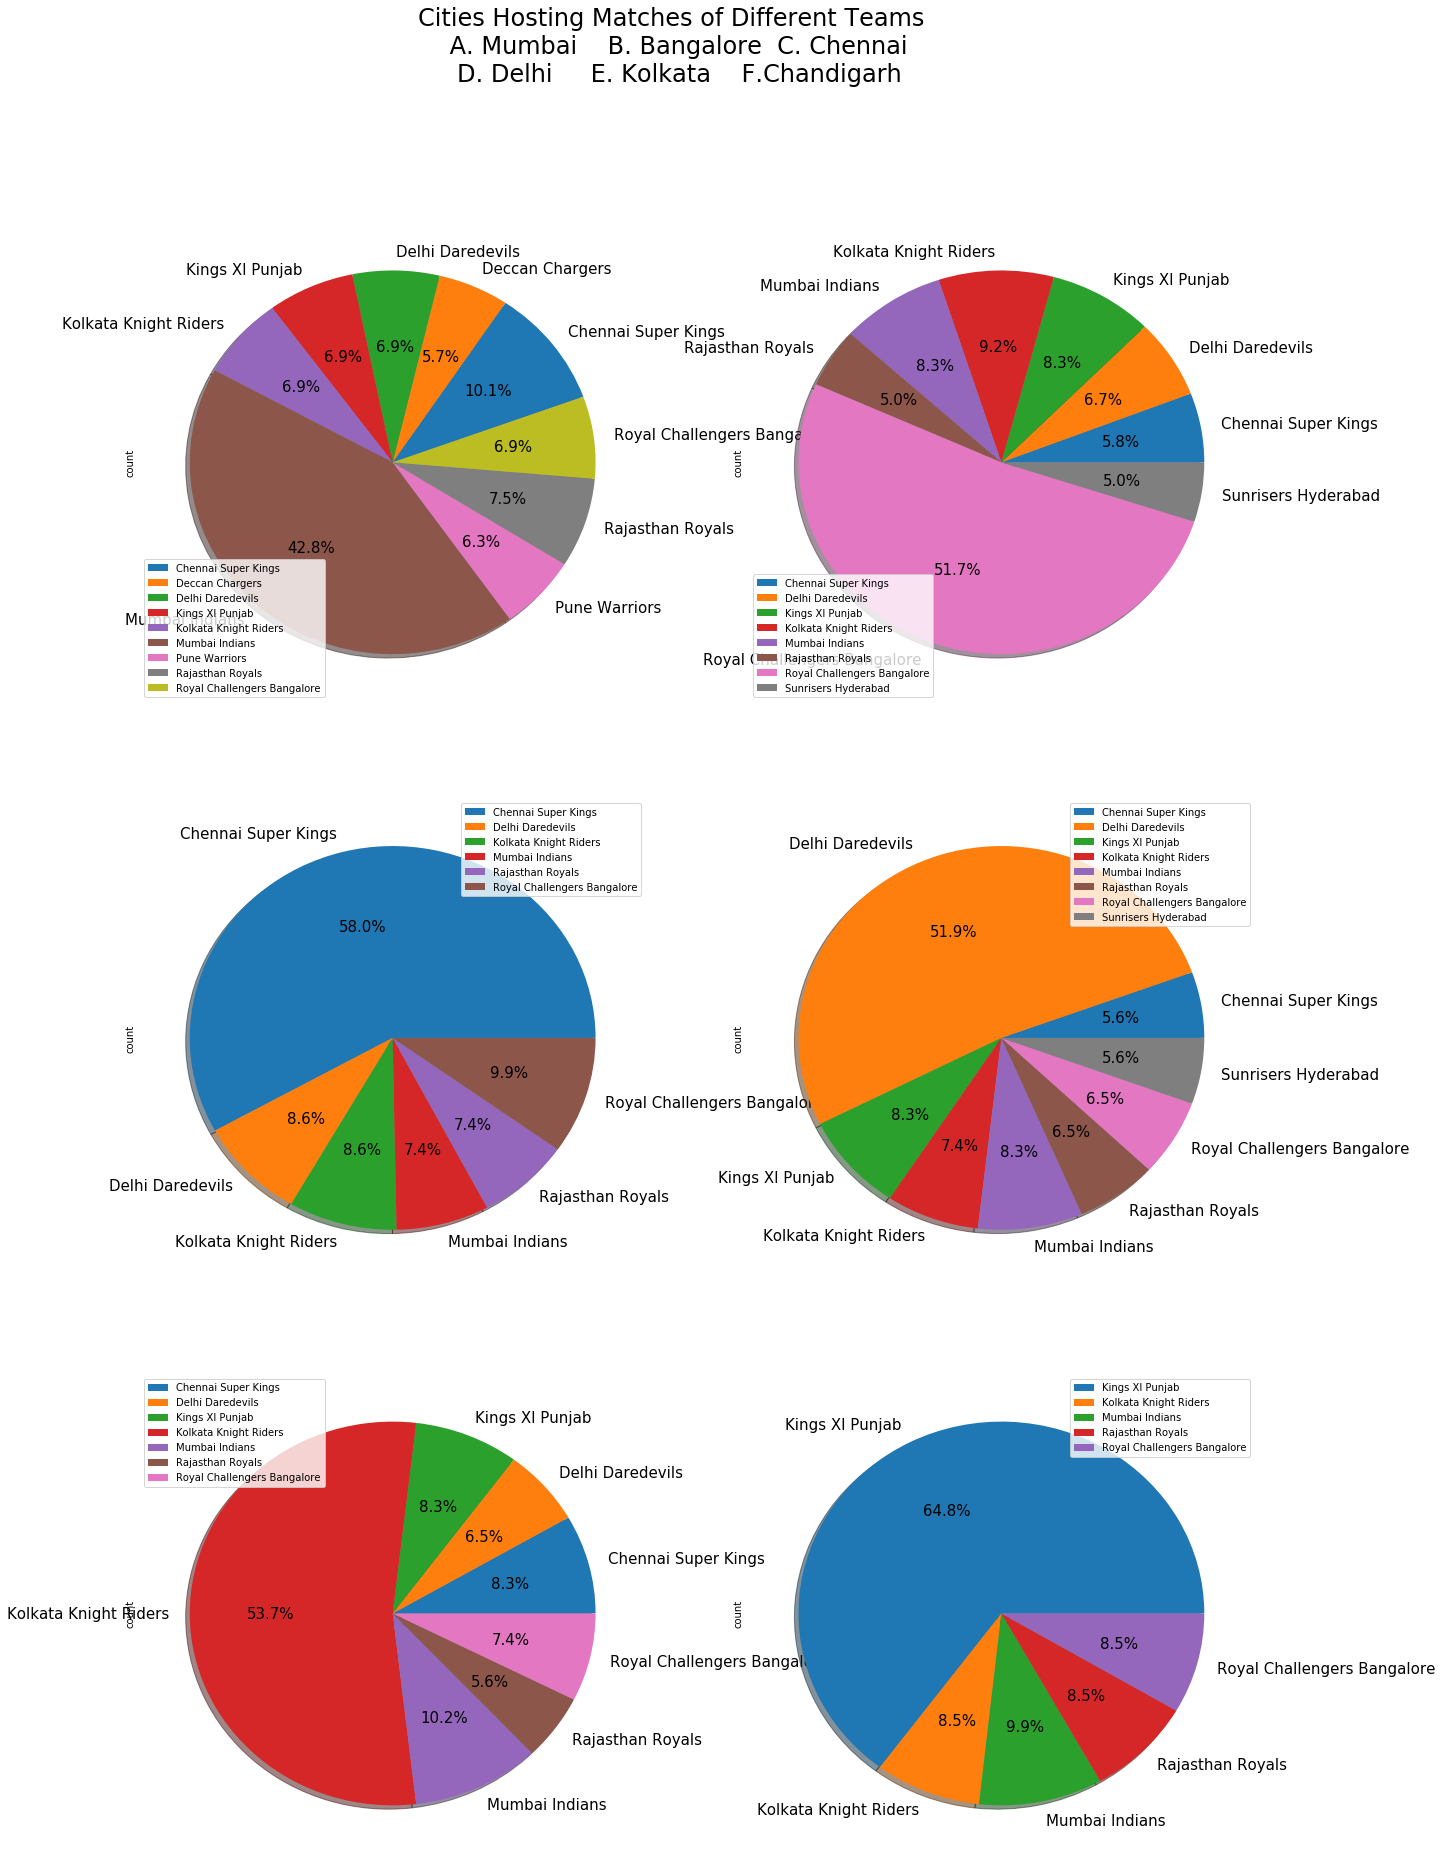

In [19]:
plt.rcParams["figure.figsize"][0] = 20
plt.rcParams["figure.figsize"][1] = 30
fig, axs = plt.subplots(3,2)
plt.suptitle("Cities Hosting Matches of Different Teams  \n "
             "A. Mumbai    B. Bangalore  C. Chennai \n"
             "D. Delhi     E. Kolkata    F.Chandigarh", fontsize = 24)
team_city1.plot(kind = 'pie' , subplots = True, ax = axs[0][0],  autopct = "%1.1f%%", shadow= True, startangle=20, fontsize = 15)
team_city2.plot(kind = 'pie' , subplots = True, ax = axs[0][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city3.plot(kind = 'pie' , subplots = True, ax = axs[1][0],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city4.plot(kind = 'pie' , subplots = True, ax = axs[1][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city5.plot(kind = 'pie' , subplots = True, ax = axs[2][0],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city6.plot(kind = 'pie' , subplots = True, ax = axs[2][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
plt.show()

<h2 style = 'color:#8B1A1A'> 5 A.Toss Win/Loss V/S Match Win/Loss</h2>

<h3> Finding the percentage of winning the match of every team after winning the toss </h3>

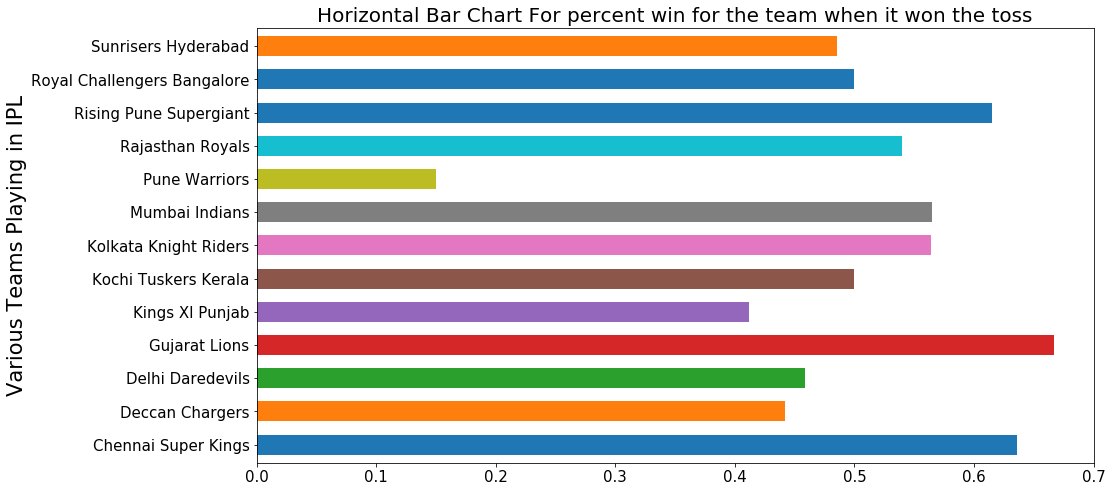

In [20]:
win_game = matches[matches['toss_winner'] == matches['winner']]
toss_win = pd.crosstab(index = win_game['winner'], columns = 'count')
toss_all = pd.crosstab(index = matches['toss_winner'], columns = 'count')
toss_all['won_match'] = toss_win['count']
toss_all['percent'] = toss_win['count'] / toss_all['count']
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 8
toss_all['percent'].plot(kind = 'barh', width = 0.6, fontsize = 15)
plt.ylabel("Various Teams Playing in IPL", fontsize =21)
plt.title("Horizontal Bar Chart For percent win for the team when it won the toss" , fontsize = 20)
plt.show()

<h2 style = 'color:#8B1A1A'> 5 B.Preference to batting or bowling after winning the toss v/s Final Match Win </h2>

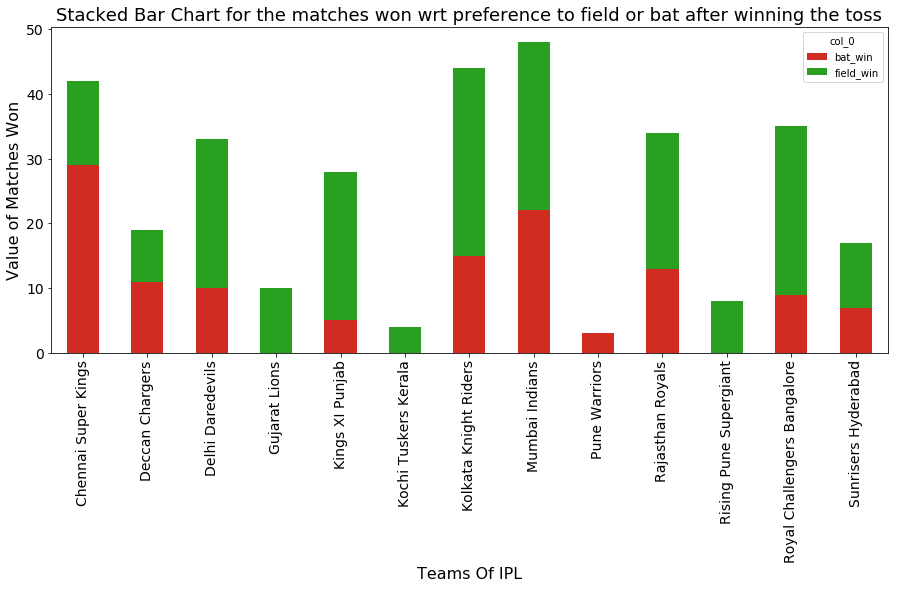

In [21]:
win_game.head(4)
field_win = win_game[win_game['toss_decision'] == 'field']
bat_win = win_game[win_game['toss_decision'] == 'bat']
bat = pd.crosstab(index = bat_win['winner'] , columns = 'count')
field = pd.crosstab(index = field_win['winner'], columns = 'count')
toss_all['bat_win'] = bat['count']
toss_all['field_win'] = field['count']
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 6
toss_all[['bat_win', 'field_win']].plot(kind = 'bar', stacked = True, fontsize = 14, color = ['#D12C22', '#2AA023'])
plt.title("Stacked Bar Chart for the matches won wrt preference to field or bat after winning the toss", fontsize = 18)
plt.ylabel("Value of Matches Won", fontsize = 16)
plt.xlabel("Teams Of IPL", fontsize = 16)
plt.show()

<h2 style = 'color:#8B1A1A'>6.  Analysis on all the player of the matches </h2>

Text(0.5,1,'Doughnut Chart for top 15 Cricketers who have been Man of the Matches')

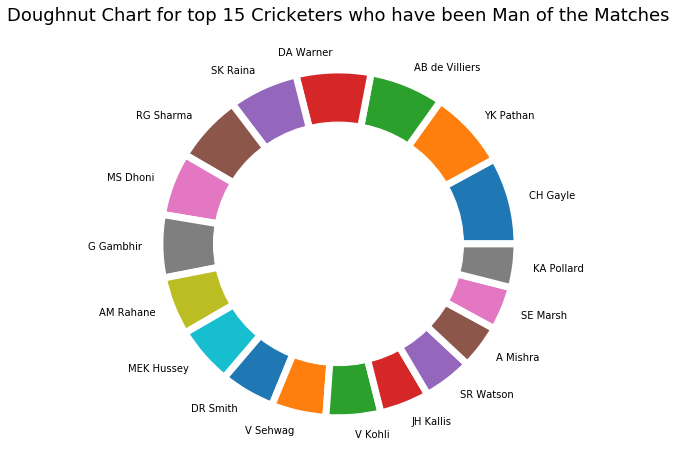

In [22]:
#Finding the count of each player being the man of the match and selecting top 15 to plot the chart
player = matches['player_of_match']
from collections import Counter
count = Counter(player).values()
list1 = pd.DataFrame({'Player' :matches['player_of_match'].unique()})
list1['count'] = count
list1 = list1[list1['count'] > 8].sort_values(by = 'count', ascending = False)
#plotting the Doughnut Chart 
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 8
plt.pie(list1['count'], labels = list1['Player'], wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'})
my_circle = plt.Circle(( 0,0) , 0.7 , color = 'White')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Doughnut Chart for top 15 Cricketers who have been Man of the Matches", fontsize= 18)

<h2 style = 'color:#8B1A1A'>7. Analysis of Teams Winning By More Than 80 Runs in all the matches of IPL</h2>

Text(0,0.5,'Runs By Which a Team has won')

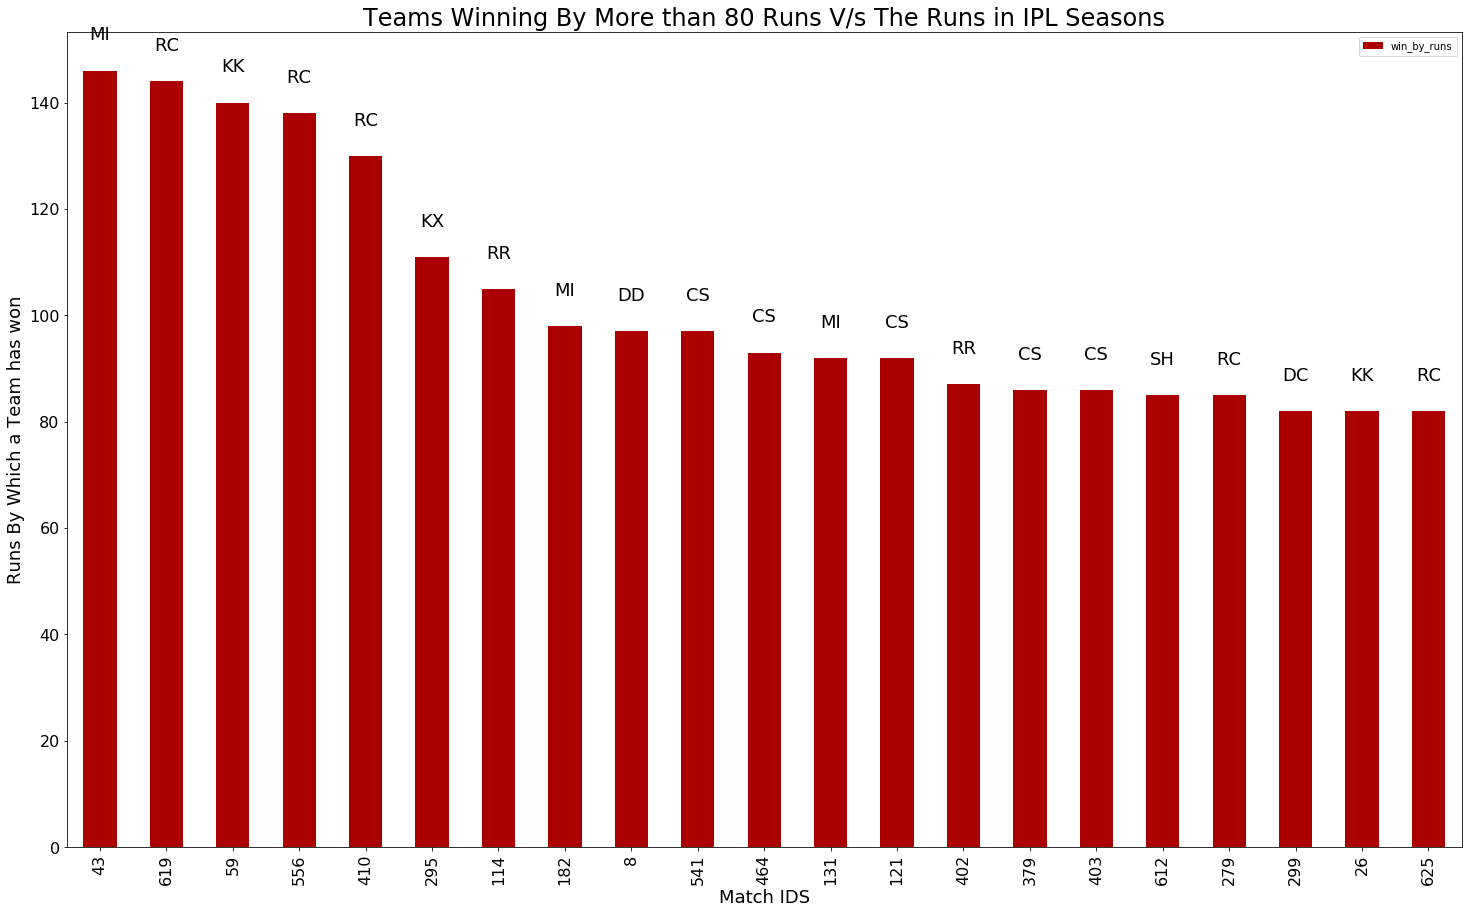

In [23]:
plt.rcParams["figure.figsize"][0] = 25
plt.rcParams["figure.figsize"][1] = 15
win = matches[['win_by_runs','winner']]
win = win.sort_values(by = 'win_by_runs', ascending = False)
win = win[win['win_by_runs'] > 80]

list1 = win['winner']
list2 =[i.split()[0][0] for i in list1]
list3 =[j.split()[1][0] for j in list1]
list4 = []
i = 0
while i < 21: 
    list4.append(list2[i] + list3[i])
    i = i  + 1


ax =  win.plot(kind = 'bar' , color = '#AA0000', fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in list4]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize = 18)
plt.title("Teams Winning By More than 80 Runs V/s The Runs in IPL Seasons", fontsize = 24)
plt.xlabel("Match IDS", fontsize = 18)
plt.ylabel("Runs By Which a Team has won", fontsize = 18)

<h2 style = 'color:#8B1A1A'>8. Analysis of Minimum and Maximum Wickets by which any team has won in IPL Seasons</h2>

Text(0,0.5,'Wickets By Which Team has Won')

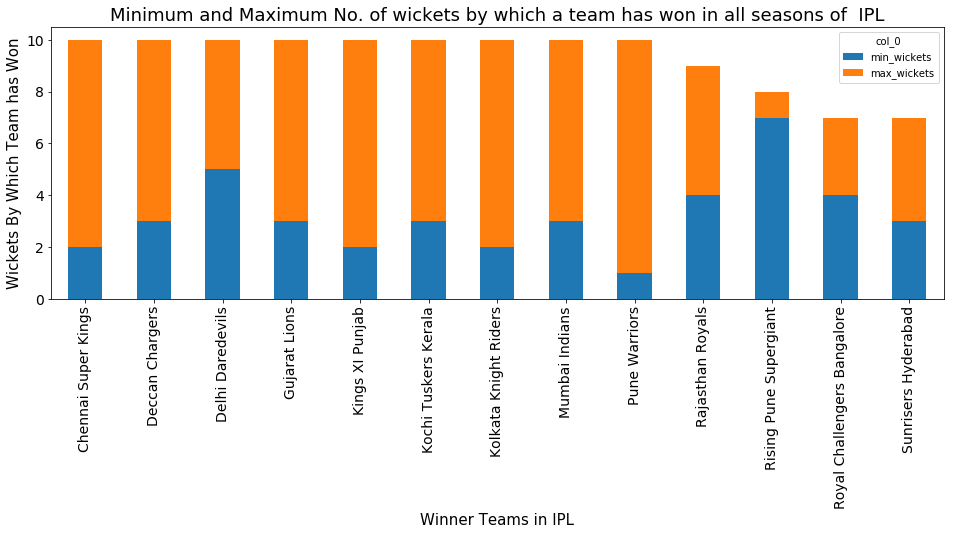

In [24]:
plt.rcParams["figure.figsize"][0] = 16
plt.rcParams["figure.figsize"][1] = 5
win2 = matches[['win_by_wickets','winner']]
win2 = win2.sort_values(by = 'win_by_wickets', ascending = False)
win2 = win2[win2['win_by_wickets'] > 0]
win_field = pd.crosstab(index = win2['winner'] , columns = 'count')
list1 = []
list1 = win2['winner'].unique()
min_wicket = []
max_wicket = []
diff_wicket = []
i = 0 
while i < 13: 
    min_wicket.append(win2[win2['winner'] == list1[i]]['win_by_wickets'].min())
    max_wicket.append(win2[win2['winner'] == list1[i]]['win_by_wickets'].max())
    diff_wicket.append(max_wicket[i] - min_wicket[i])
    i = i + 1

win_field['max_wickets'] = diff_wicket
win_field['min_wickets'] = min_wicket
win_field[['min_wickets' ,'max_wickets']].plot(kind = 'bar', stacked = True, fontsize = 14)
plt.title("Minimum and Maximum No. of wickets by which a team has won in all seasons of  IPL" , fontsize = 18)
plt.xlabel("Winner Teams in IPL", fontsize = 15)
plt.ylabel("Wickets By Which Team has Won" , fontsize = 15)

<h2 style = 'color:#8B1A1A'>9. Getting The  Scores of All Team in each Season in IPL </h2>

In [25]:
#Adding seasons in deliveries dataframe
s = deliveries.match_id.replace(matches.set_index('id')['season'])
deliveries['season'] = s
deliveries['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

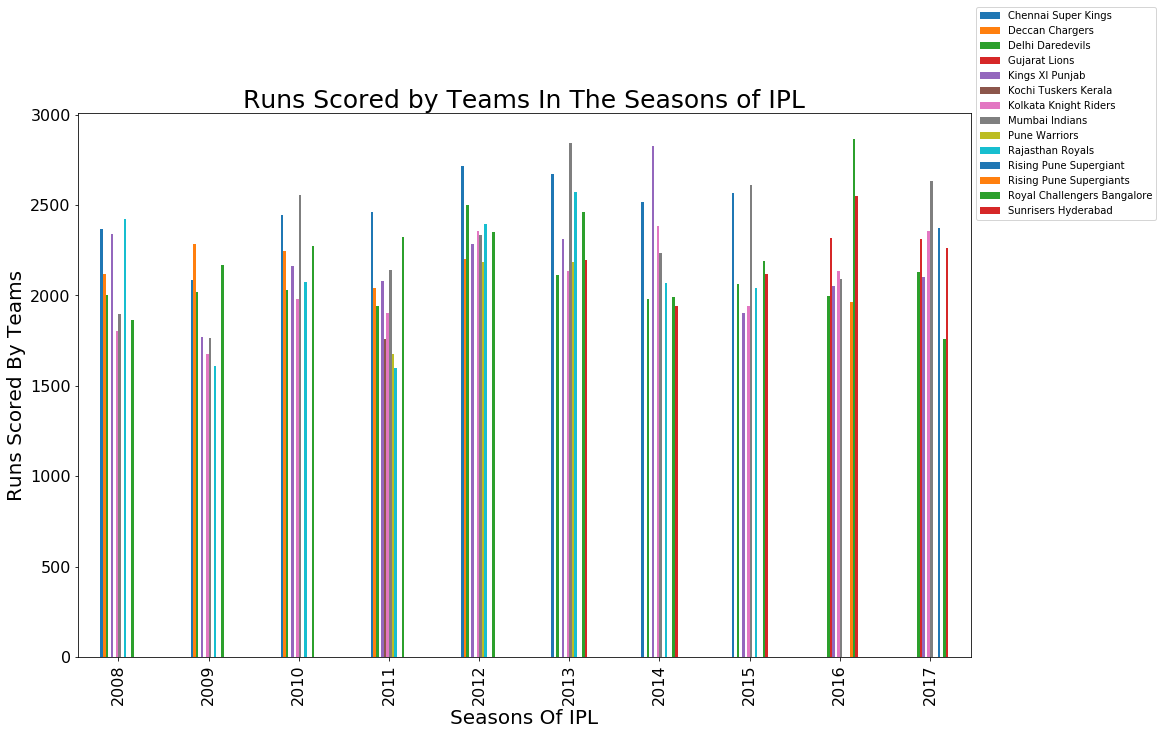

In [26]:
fig, ax = plt.subplots(figsize=(16,10))
deliveries_by_season = deliveries.groupby(['season' , 'batting_team']).sum()
deliveries_by_season['batsman_runs'].unstack().plot(kind = 'bar',ax = ax, width = 0.4, fontsize = 16)
plt.title("Runs Scored by Teams In The Seasons of IPL" , fontsize = 25)
plt.ylabel("Runs Scored By Teams" ,fontsize = 20)
plt.xlabel("Seasons Of IPL", fontsize = 20)
ax.legend(loc='center left', bbox_to_anchor=(1, 1))

<h2 style = 'color:#8B1A1A'>10. Getting The  Wickets of All Team in each Season in IPL </h2>

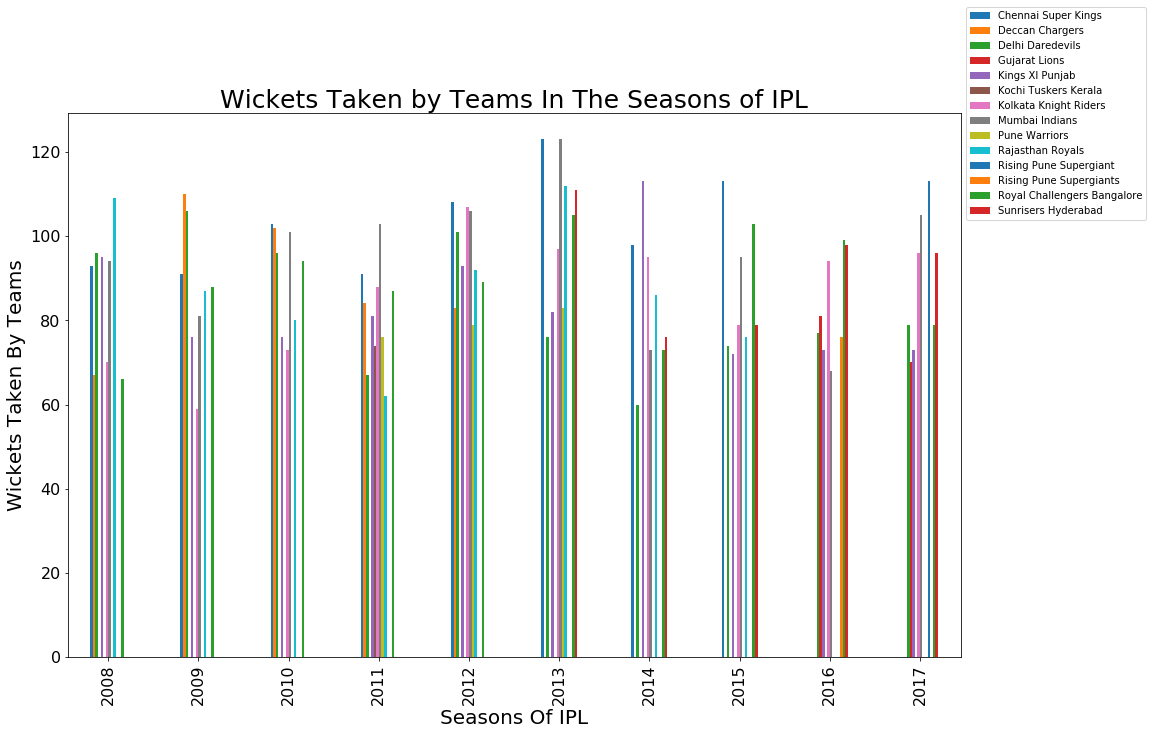

In [27]:
deliveries['player_dismissed_no'] = deliveries['player_dismissed']
deliveries['player_dismissed_no'] = np.where(deliveries['player_dismissed_no'].isnull(), 0 , 1)
wickets_by_season = deliveries.groupby(['season' , 'bowling_team']).sum()
fig, ax = plt.subplots(figsize=(16,10))
wickets_by_season['player_dismissed_no'].unstack().plot(kind = 'bar',ax = ax, width = 0.4, fontsize = 16)
plt.title("Wickets Taken by Teams In The Seasons of IPL" , fontsize = 25)
plt.ylabel("Wickets Taken By Teams" ,fontsize = 20)
plt.xlabel("Seasons Of IPL", fontsize = 20)
ax.legend(loc='center left', bbox_to_anchor=(1, 1))

<h2 style = 'color:#8B1A1A'>11. Getting The Highest Scores of All Seasons and Their Scores </h2>

In [28]:
# Getting the  HIghest Scoreres of All Seasons 
a = deliveries.groupby(['batsman','season']).sum()
bat = a[a['batsman_runs'] > 10].sort_values(by = 'season')
batsman_all = bat.groupby(level=['season' , 'batsman']).max()
season_batsman = batsman_all.groupby(level = ['season']).max()
i = 2008 
batsman_array = []
while i < 2018: 
    season_which = batsman_all.groupby(['season']).get_group(i)
    runs_total = season_which[season_which['total_runs'] == season_batsman['total_runs'][i]]
    batsman = runs_total.groupby('batsman').groups.keys()
    for key in batsman:
        batsman_array.append(key)
    i = i + 1
batsman_array

['SE Marsh',
 'ML Hayden',
 'SR Tendulkar',
 'CH Gayle',
 'CH Gayle',
 'CH Gayle',
 'RV Uthappa',
 'DA Warner',
 'V Kohli',
 'DA Warner']

Text(0,0.5,'Runs Scored By the Highest Scorers')

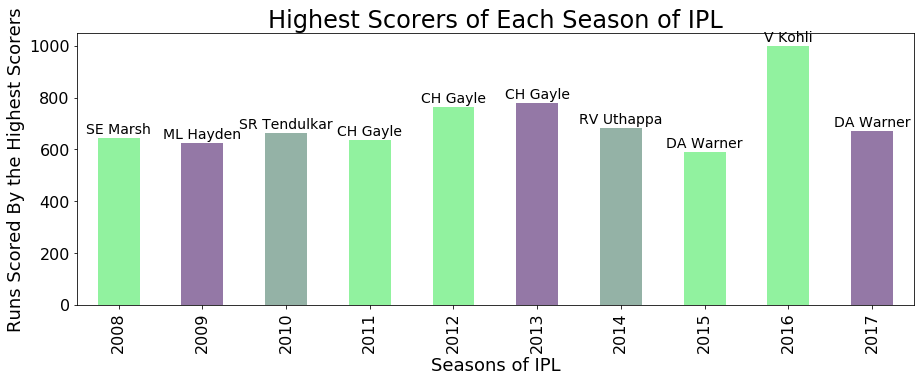

In [29]:
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 5
ax =  season_batsman['total_runs'].plot(kind = 'bar' , color = ['#91F29F','#9478A6','#94B2A6'], fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in batsman_array]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize = 14)
plt.title("Highest Scorers of Each Season of IPL", fontsize = 24)
plt.xlabel("Seasons of IPL", fontsize = 18)
plt.ylabel("Runs Scored By the Highest Scorers", fontsize = 18)

<h2 style = 'color:#8B1A1A'>12. Getting The Highest Wicket Taking Players of All Seasons and No. of Wickets Taken </h2>

In [30]:
field = deliveries.groupby(['season' , 'bowler']).sum()
bowlers_all = field.groupby(level = ['season' , 'bowler']).max()
bowlers_max = field.groupby(level = ['season']).max()
max_wickets = bowlers_max['player_dismissed_no']
i = 2008
bowler_array = []
while i < 2018:
    season_b = bowlers_all.groupby(['season']).get_group(i)
    bowler_find = season_b[season_b['player_dismissed_no'] == max_wickets[i]]
    bowlers = bowler_find.groupby(['bowler']).groups.keys()
    for key in bowlers: 
        bowler_array.append(key)
    i = i + 1
bowler_array

['Sohail Tanvir',
 'RP Singh',
 'PP Ojha',
 'SL Malinga',
 'M Morkel',
 'DJ Bravo',
 'MM Sharma',
 'DJ Bravo',
 'B Kumar',
 'B Kumar']

Text(0,0.5,'Wickets Taken By the Bowlers')

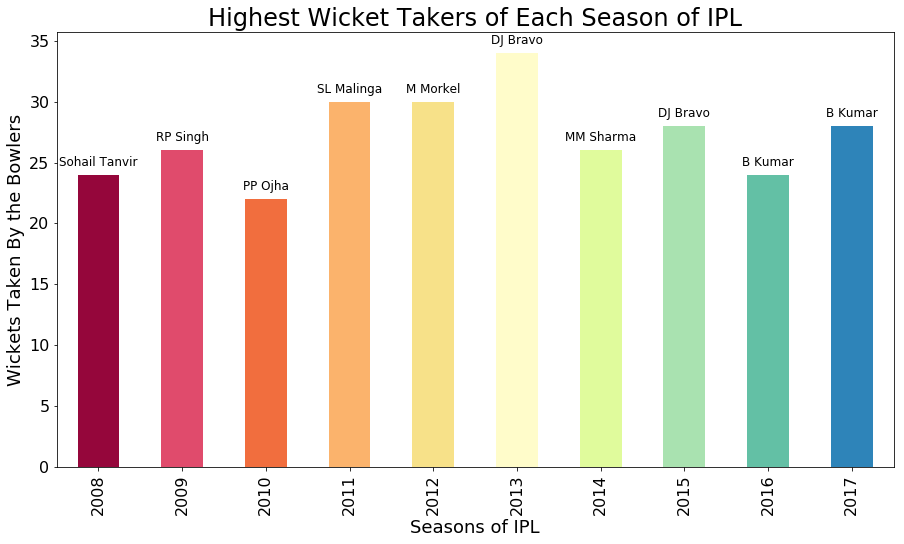

In [31]:
plt.rcParams['figure.figsize'][1] = 8
ax =  max_wickets.plot(kind = 'bar' , color = ['#95063B', '#E04B6C' , '#F16E3E' , '#FBB36C' , '#F7E189' , 
                                               '#FFFCCA' , '#E0FB9C','#A9E2B0' , '#63C0A5' , '#2E84B9']  , fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in bowler_array]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +0.5, label,
            ha='center', va='bottom', fontsize = 12)
plt.title("Highest Wicket Takers of Each Season of IPL", fontsize = 24)
plt.xlabel("Seasons of IPL", fontsize = 18)
plt.ylabel("Wickets Taken By the Bowlers", fontsize = 18)

<h2 style = 'color:#8B1A1A'>13.Record of Players with highest no. of 4's and 6's in all seasons</h2>

In [32]:
special4 = deliveries[deliveries['batsman_runs'] == 4]
special6 = deliveries[deliveries['batsman_runs']== 6]
total4   = special4.groupby(['season' , 'batsman']).count()
total6   = special6.groupby(['season' , 'batsman']).count()
high4    = total4.groupby(level=['season', 'batsman']).max()
high6    = total6.groupby(level=['season', 'batsman']).max()
batsman4 = high4.groupby(level = ['season']).max()
batsman6 = high6.groupby(level = ['season']).max()
i = 2008 
batsman_array4 = []
batsman_array6 = []
while i < 2018:
    season4_which = high4.groupby(['season']).get_group(i)
    batsman4_which = season4_which[season4_which['batsman_runs'] == batsman4['batsman_runs'][i]]
    bat4 = batsman4_which.groupby('batsman').groups.keys()
    for key4 in bat4:
        batsman_array4.append(key4)
    season6_which = high6.groupby(['season']).get_group(i)
    batsman6_which = season6_which[season6_which['batsman_runs'] == batsman6['batsman_runs'][i]]
    bat6 = batsman6_which.groupby('batsman').groups.keys()
    for key6 in bat6:
        batsman_array6.append(key6)
    i = i + 1
batsman_array6.pop()
dataframe = pd.DataFrame({'Number of 4s': batsman4['batsman_runs']  , 'Number of 6s': batsman6['batsman_runs'] })
final_list = batsman_array4 + batsman_array6
dataframe

,Number of 4s,Number of 6s
season,,
2008,68,31
2009,60,29
2010,86,27
2011,67,44
2012,73,59
2013,81,52
2014,74,36
2015,65,38
2016,88,38


Text(0,0.5,"No. of 4's and 6's by Batsman")

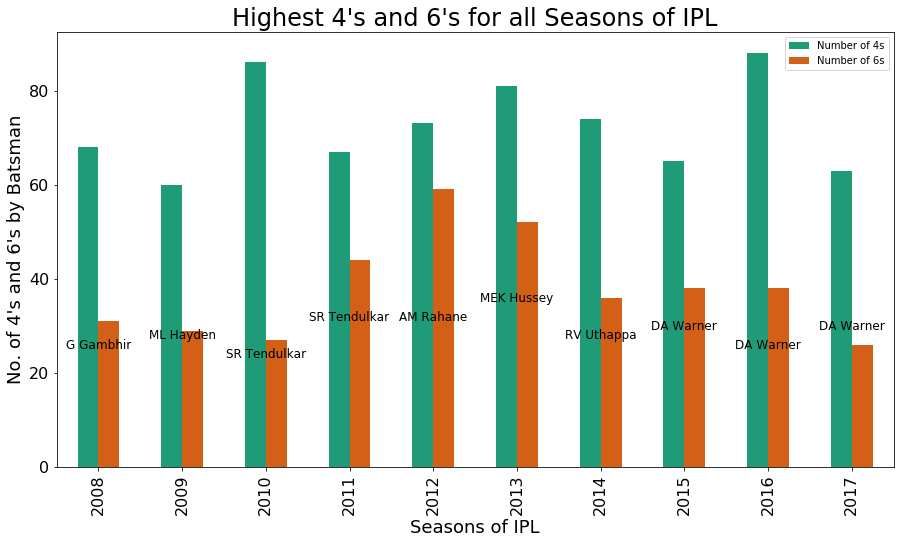

In [33]:
plt.rcParams['figure.figsize'][1] = 8
ax =  dataframe[['Number of 4s' , 'Number of 6s']].plot(kind = 'bar'  , stacked = False,  fontsize = 16, color = ['#1F9C77' , '#D45F16'])
labels = ["%s" % i for i in final_list]
rect =  ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +0.5, label,
            ha='center', va='bottom', fontsize = 12)
plt.title("Highest 4's and 6's for all Seasons of IPL", fontsize = 24)
plt.xlabel("Seasons of IPL", fontsize = 18)
plt.ylabel("No. of 4's and 6's by Batsman", fontsize = 18)

<h2 style = 'color:#8B1A1A'>14. Finding the Number of Players Getting Dismissed By Different Dismissal Type</h2>

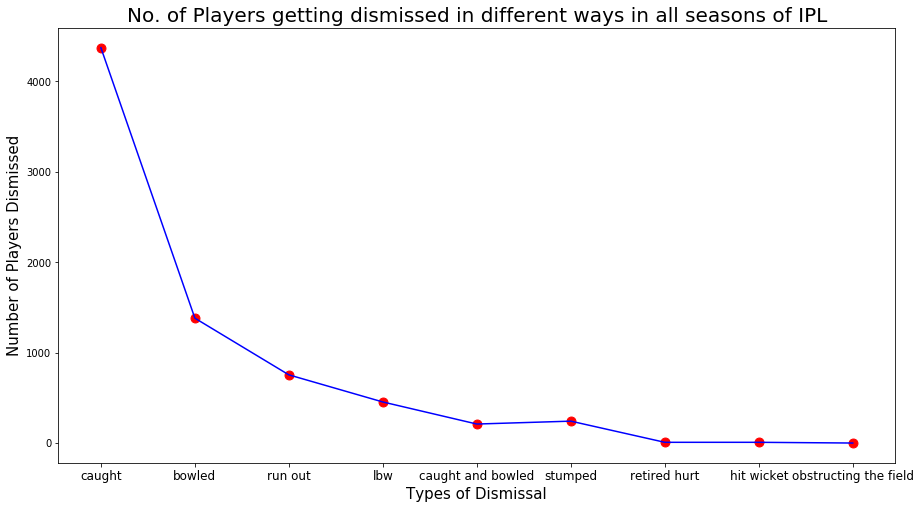

In [34]:
plt.rcParams['figure.figsize'][0] = 15
plt.rcParams['figure.figsize'][1] = 8
dismissal = deliveries.dropna(subset =  ['dismissal_kind'])
dismis = dismissal['dismissal_kind']
dismissal_type = pd.crosstab(index = dismis, columns = 'count')
dataframe = pd.DataFrame({'Number of Each Type':dismissal_type['count']})
x = np.arange(1,10,1)
y = []
xtick = [i for i in dismis.unique()]
for a in xtick:
    y.append(dataframe['Number of Each Type'][a])
plt.xticks(x,xtick, fontsize = 12)
plt.scatter(x,y,color = 'red',marker = 'o' , s =80)
plt.plot(x,y,color = 'blue')
plt.title('No. of Players getting dismissed in different ways in all seasons of IPL' , fontsize = 20)
plt.xlabel("Types of Dismissal",fontsize = 15)
plt.ylabel("Number of Players Dismissed" , fontsize = 15)
plt.show()

<h2 style = 'color:#8B1A1A'>15. Maximum No. of Catches Taken By the Players in Each Season of IPL</h2>

In [35]:
caught = deliveries[(deliveries['dismissal_kind'] == "caught and bowled") | (deliveries['dismissal_kind'] == 'caught')]
fielder = caught.groupby(['season' , 'fielder']).count()
fielders_all = fielder.groupby(level = ['season' , 'fielder']).max()
season_catch = fielder.groupby(level = ['season']).max()
catches = season_catch['player_dismissed_no']
i = 2008
fielder_array = []
while i < 2018:
    season_f = fielders_all.groupby(['season']).get_group(i)
    fielder_find = season_f[season_f['player_dismissed_no'] == catches[i]]
    fielders = fielder_find.groupby(['fielder']).groups.keys()
    for key in fielders: 
        fielder_array.append(key)
    i = i + 1
catches

season
2008    10
2009    13
2010    12
2011    17
2012    14
2013    15
2014    14
2015    14
2016    19
2017    15
Name: player_dismissed_no, dtype: int64

Text(0.5,0,'Catches Taken By the Bowlers')

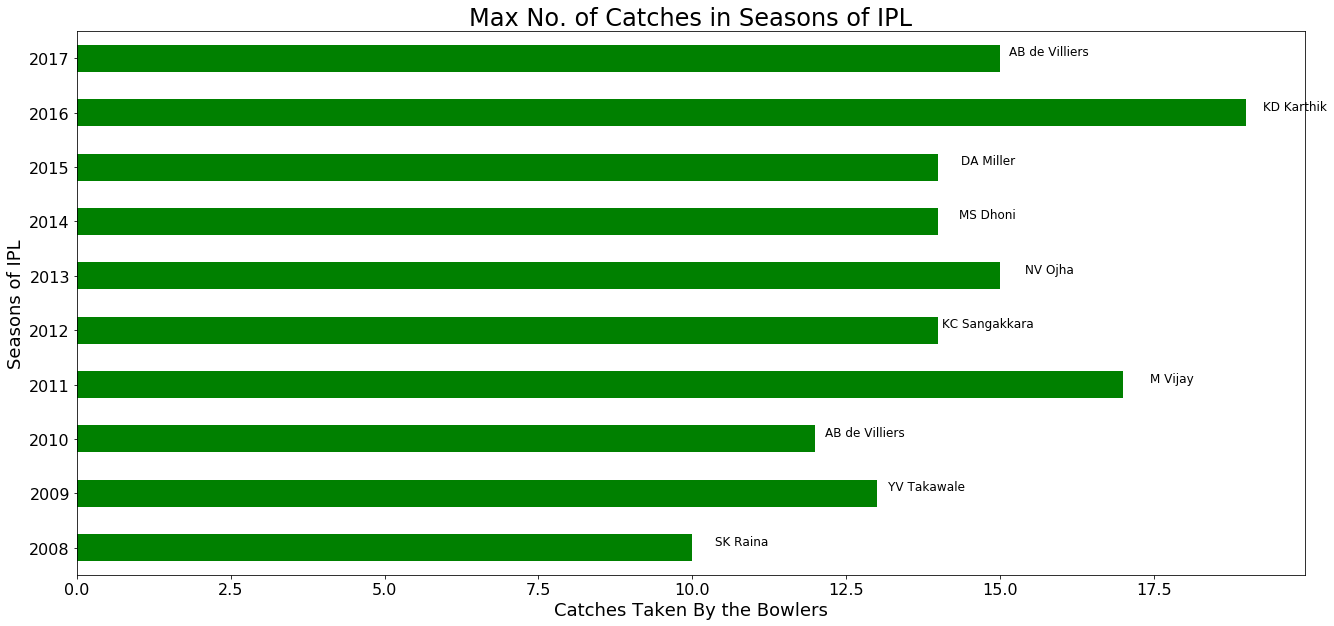

In [36]:
plt.rcParams['figure.figsize'][0] = 22
plt.rcParams['figure.figsize'][1] = 10
ax =  catches.plot(kind = 'barh' , color = 'green' , fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in fielder_array]
for rect, label in zip(rects, labels):
    ax.text(rect.get_width() + 0.8, rect.get_y() + rect.get_height()/2, label,
            ha='center', va='bottom', fontsize = 12)
plt.title("Max No. of Catches in Seasons of IPL", fontsize = 24)
plt.ylabel("Seasons of IPL", fontsize = 18)
plt.xlabel("Catches Taken By the Bowlers", fontsize = 18)

<h2 style = 'color:#8B1A1A'>16. Average Runs Scored Per Over In each Season of IPL</h2>

In [98]:
runs = deliveries.groupby(['season' , 'over']).sum()
matches = deliveries.groupby(['season'])['match_id'].unique()
len(matches[2008])
no_matches = []
for index in matches.index:
    no_matches.append(len(matches[index]))
no_matches_df = pd.DataFrame({"Seasons": matches.index , "No. of Matches": no_matches})
average_runs = pd.DataFrame({"Total Runs":runs['total_runs'] })
no_matches_df['No. of Matches']

0    58
1    57
2    60
3    73
4    74
5    76
6    60
7    59
8    60
9    59
Name: No. of Matches, dtype: int64

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Average Scores Per Ball In Each Season')

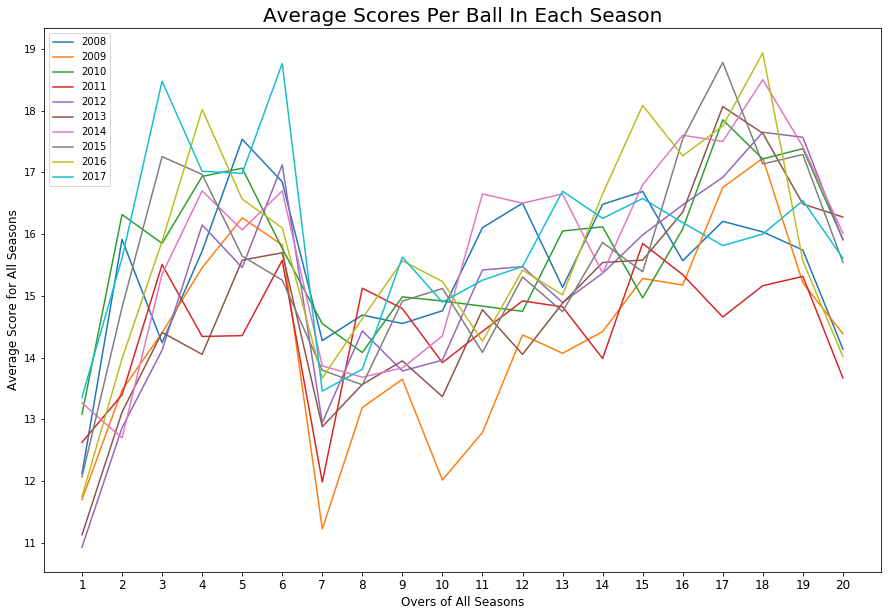

In [99]:
i = 2008 
season_total = pd.DataFrame({})
while i < 2018:
    new = "season_over_%d"%i
    new = average_runs.groupby('season').get_group(i)
    new['Average_runs'] = new['Total Runs']/no_matches_df['No. of Matches'][i - 2008]
    new["Average_runs"].plot(label = i)
    i = i + 1
x = range(0,20)
xtick = range(1,21)
plt.xticks(x, xtick, fontsize= 12)
plt.xlabel("Overs of All Seasons" , fontsize = 12)
plt.ylabel("Average Score for All Seasons" , fontsize = 12)
plt.legend()
plt.title("Average Scores Per Ball In Each Season" , fontsize = 20)

<h2 style = 'color:#8B1A1A'>17. Top 15 Batsman Considering all Seasons of IPL (Highest Score)</h2>

Text(0,0.5,'Runs Scored by the Top Batsman')

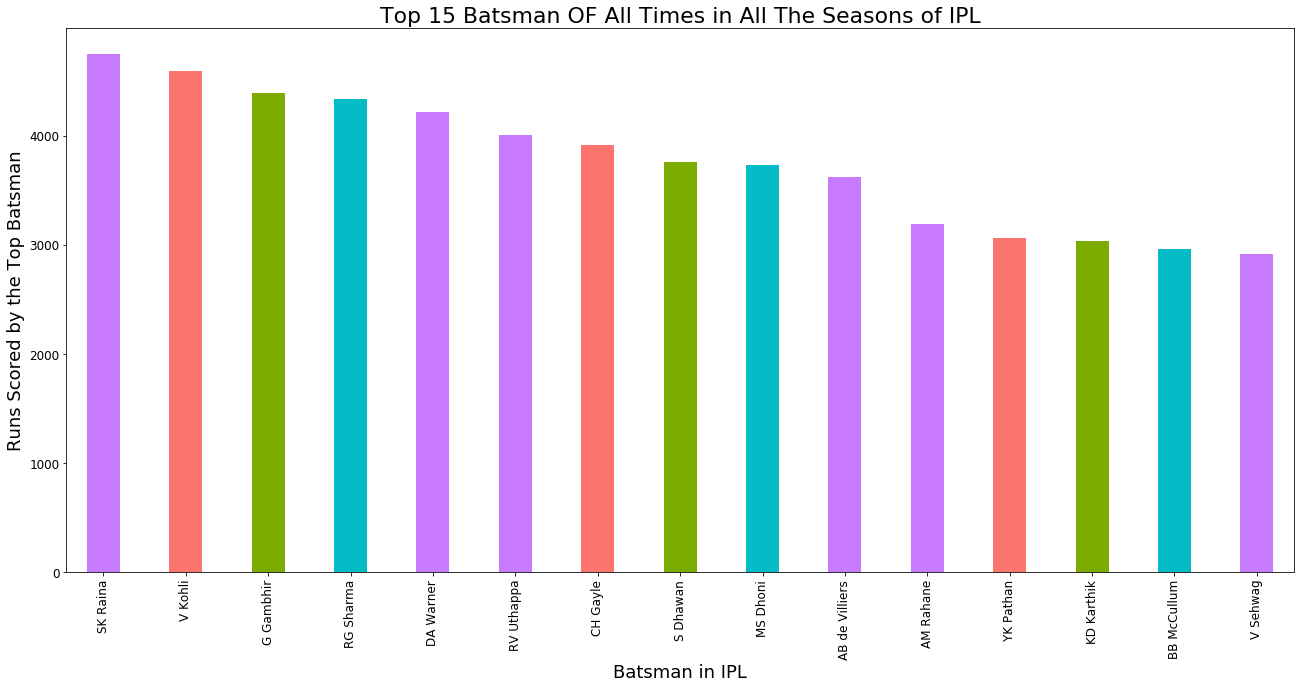

In [40]:
batsmen_order = deliveries.groupby(['batsman']).sum().sort_values(by = 'total_runs' , ascending = False)
batsmen15 = batsmen_order.head(15)
batsmen15['total_runs'].plot(kind = 'bar', color = ['#C77AFD' , '#FB746E' , '#7DAC00' , '#03BCC6'],width= 0.4, fontsize = 12)
plt.rcParams['figure.figsize'][0] = 15
plt.rcParams['figure.figsize'][1] = 10
plt.title("Top 15 Batsman OF All Times in All The Seasons of IPL" ,fontsize = 22)
plt.xlabel("Batsman in IPL", fontsize = 18)
plt.ylabel("Runs Scored by the Top Batsman" , fontsize = 18)

<h2 style = 'color:#8B1A1A'>18. Top 15 Bowlers Considering All Seasons of IPL (Maximum Wickets)</h2>

Text(0,0.5,'Wickets Taken by the Top Bowlers')

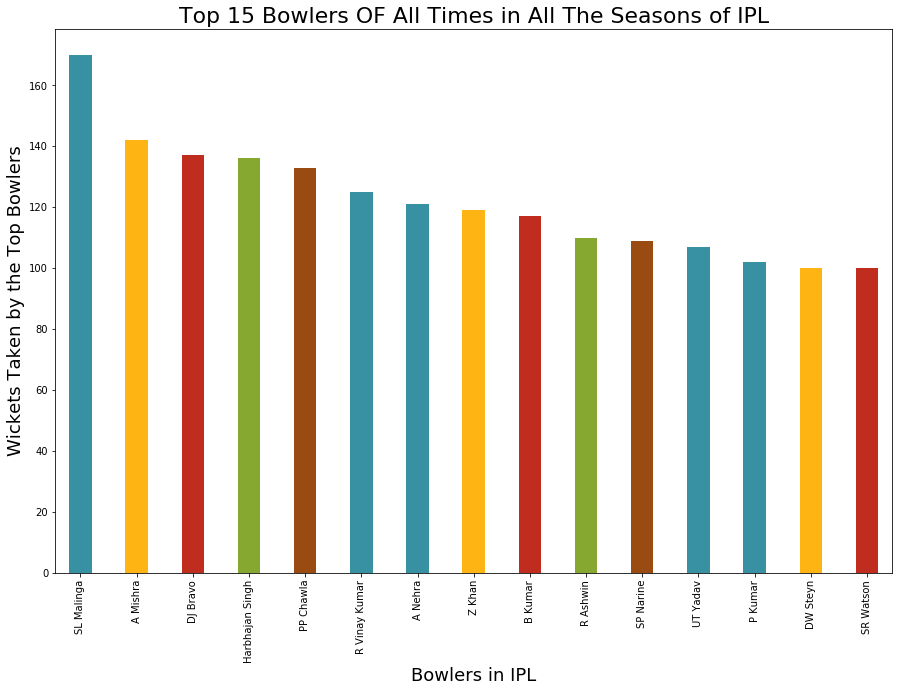

In [41]:
bowlers_order = deliveries.groupby(['bowler']).sum().sort_values(by = 'player_dismissed_no', ascending = False)
bowlers15 = bowlers_order.head(15)
bowlers15['player_dismissed_no'].plot(kind = 'bar', color = ['#3791A3' , '#FEB412' , '#C02D1F' , '#87A830' , '#994B12'] , width = 0.4)
plt.title("Top 15 Bowlers OF All Times in All The Seasons of IPL" ,fontsize = 22)
plt.xlabel("Bowlers in IPL", fontsize = 18)
plt.ylabel("Wickets Taken by the Top Bowlers" , fontsize = 18)